## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

## Question 1 - Create a scatter plot

### First steps

1. Import Pandas and Matplotlib.pyplot packets;
2. Define plot parameters
3. Import CSV file inside notebok (last argument is a bonus)


In [ ]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

office_df=pd.read_csv("datasets/office_episodes.csv",parse_dates=['release_date'])
# Last argument 'parse_dates' tells Pandas how to interpret the 'release_date' column as dates

office_df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


Take a look at DataFrame element types in each column. This gives us good information about what is inside the DF and, more importantly, we can see that in `guest_stars` column there are missing values. 

In [ ]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

### Colors and Size scheme
We need to create a color scheme to understand how changed episode ratings from beginning to the end of the tv show.

In [ ]:
cols = [] #Creiamo una lista vuota

for ind,row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')
cols[:5] # Print just the first 5 elements to mantain clean the notebook

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen']

Similarly we can create a size scheme to identify the episodes with special guest stars and represent them with a different marker inside the plot. 

In [ ]:
sizes = [] # Creo una seconda lista vuota per la presenza di guests stars

for ind,row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)
sizes[:5] # Print just the first 5 elements to mantain clean the notebook

[25, 25, 25, 25, 25]

### Scatter Plot
As first attempt we generate a simple scatter plot containing both the colors and size scheme. The biggers points represent the episodes with guest stars.

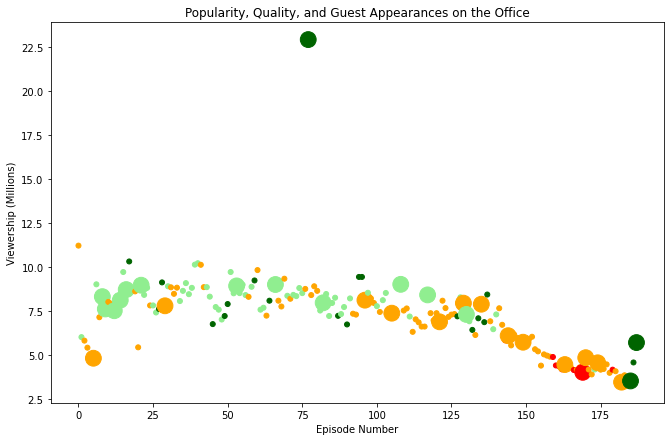

In [ ]:
fig = plt.figure()
plt.scatter(x=office_df['episode_number'],
            y=office_df['viewership_mil'],
           c=cols,
           s=sizes)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

Analyzing the plot we can get different information:
   1. The overall episode ratings decreased with time, except for the last episodes;
   2. We can see that there is just one episode with more than 22 mln views among the others. It was aried after a superball match.

## Question 2 - Provide the name of one of the guest stars who was in the most watched Office episode
To answer this question we need to pick the right episode from our DataFrame extracting the guest stars names from the right column. To do so, we can use two different methods:

    1. Get the only episode above 20 mil;
    2. Get the max `viewership_mil` episode;

In [ ]:
office_df[office_df['viewership_mil'] > 20]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [ ]:
office_df[office_df['viewership_mil'] == office_df['viewership_mil'].max()]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [ ]:
top_star = 'Jessica Alba' # We can pick any of the three names provided.

# Bonus Step
By using scatter plot we can define just one marker per plot. We can overcome this problem by overlapping two plot at the same time. To do so we have some work to do as the following steps:

1. Implemente colors and size scheme inside our dataframe;
2. Subset our DataFrame in two different ones:
    - One without guest stars
    - One with guest stars - where we will use a specific marker for guest stars.

In [ ]:
office_df['colors'] = cols
office_df['sizes'] = sizes

In [ ]:
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

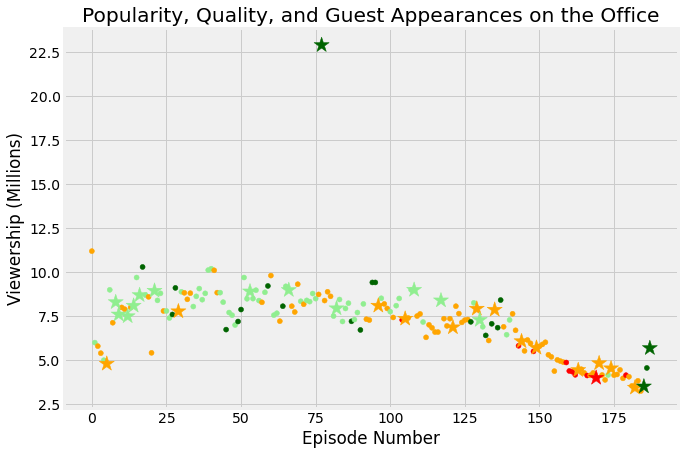

In [ ]:
fig = plt.figure()
plt.style.use('fivethirtyeight') # Bonus code to improve plot quality

# First plot for episodes without guest stars
plt.scatter(x=non_guest_df['episode_number'],
            y=non_guest_df['viewership_mil'],
           c=non_guest_df['colors'],
           s=non_guest_df['sizes'])

# Second plot for episodes with guest stars. In this one we can set the marker as a 'Star'
plt.scatter(x=guest_df['episode_number'],
            y=guest_df['viewership_mil'],
           c=guest_df['colors'],
           s=guest_df['sizes'],
           marker='*')

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

As we can see, now we have one scatter plot with two differente markers: the points form normal episodes and the star for guest stars episodes.